Notebook prepared by:
<br>
Ednalva Oliveira - student number 19732291
<br>
Ester Nunes McGarry - student number 19205519

# Multiprocessing using pools - PART 1
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [1]:
#Import all libraries
import time
import math
import multiprocessing
from multiprocessing import Pool
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import pandas as pd
import multiprocessing as mp
from time import perf_counter

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete.
    
    print("Results", result)
    overall_time = time.time()-tp1
    print(overall_time)
    return overall_time
    
 

## check_prime and check_prime_multi functions run in pool_process

In [ ]:
def check_prime(num):
    t1 = time.time()
    res = False
    if num > 0:
        # check for factors
        for i in range(2,num):
            if (num % i) == 0:
                print(num,"is not a prime number")
                print(i,"times",num//i,"is",num)
                print("Time:", int(time.time()-t1))
                break
        else:
            print(num,"is a prime number")
            print("Time:", time.time()-t1)
            res = True
            # if input number is less than
            # or equal to 1, it is not prime
    return res

In [ ]:
def check_prime_multi(my_dict):
    num = my_dict["number"]
    lower = my_dict["lower"]
    upper = my_dict["upper"]


    t1 = time.time()
    res = False
    if num > 0:
        # check for factors
        for i in range(lower, upper):
            if (num % i) == 0:
                print(num,"is not a prime number")
                print(i,"times",num//i,"is",num)
                print("Time:", int(time.time()-t1))
                break
        else:
            print(num,"prime number not confirmed")
            print("Time:", time.time()-t1)
            res = True
            # if input number is less than
            # or equal to 1, it is not prime
    print("Task", multiprocessing.current_process(), num, res)
    return res

# Check number of cores 

In [2]:
nprocs = mp.cpu_count()
print(f"Number of cpu cores:{nprocs}")

Number of cpu cores:12


# Set different group numbers

In [3]:
#Lists of prime numbers to be the data on pool_process function
#grouped by 10, 17 and 34 numbers with 8 digits
ten_numbers = [10009381, 10028899, 13057507, 12057583, 50057569, 67059353, 78097681, 87007621, 98754559, 34984513]
seventeen_numbers = [10009381, 10028899, 13057507, 12057583, 50057569, 67059353, 78097681, 87007621, 98754559, 34984513, 23457307, 33457687, 36457919, 48459403, 53457511, 64457803, 28459757]
thirty_four_numbers = [10009381, 10028899, 13057507, 12057583, 50057569, 67059353, 78097681, 87007621, 98754559, 34984513, 23457307, 33457687, 36457919, 48459403, 53457511, 64457803, 72456653, 89457113, 93457813, 12457919, 36459481, 94828337, 83628119, 27599189, 84727277, 98473643, 50473903, 45376687, 75457621, 76542439, 98241817, 88881211, 64393853, 99889901]


# Calling the pool_process function

In [4]:
#Set the number of processors to run the function
list_of_proc = [1,4,9,13]

#Create empty lists to store the running time that each processor takes to compute each group of prime numbers
time_ten_numbers = []
time_seventeen_numbers = []
time_thirty_four_numbers = []

#Run the pool_process function for each group of prime numbers according to the number of cores 
for proc in list_of_proc:
    time_ten = pool_process(check_prime, ten_numbers, proc)
    time_seventeen = pool_process(check_prime, seventeen_numbers, proc)
    time_thirty_four = pool_process(check_prime, thirty_four_numbers, proc)

    #append the overall running time to the lists
    time_ten_numbers.append(time_ten)
    time_seventeen_numbers.append(time_seventeen)
    time_thirty_four_numbers.append(time_thirty_four)

10009381 is a prime number
Time: 0.6252269744873047
10028899 is a prime number
Time: 0.5892970561981201
13057507 is a prime number
Time: 0.7812469005584717
12057583 is a prime number
Time: 0.7385542392730713
50057569 is a prime number
Time: 2.9772119522094727
67059353 is a prime number
Time: 3.9180290699005127
78097681 is a prime number
Time: 4.4892048835754395
87007621 is a prime number
Time: 4.895186901092529
98754559 is a prime number
Time: 5.5611701011657715
34984513 is a prime number
Time: 2.0020039081573486
Results [True, True, True, True, True, True, True, True, True, True]
26.67635703086853
10009381 is a prime number
Time: 0.5702152252197266
10028899 is a prime number
Time: 0.5654149055480957
13057507 is a prime number
Time: 0.7525482177734375
12057583 is a prime number
Time: 0.6890461444854736
50057569 is a prime number
Time: 2.8106250762939453
67059353 is a prime number
Time: 3.7159762382507324
78097681 is a prime number
Time: 4.426739931106567
87007621 is a prime number
Time

Time: 6.382839918136597
36457919 is a prime number
Time: 4.778599977493286
67059353 is a prime number
Time: 8.438674926757812
28459757 is a prime number
Time: 3.1211280822753906
78097681 is a prime number
Time: 9.550283908843994
48459403 is a prime number
Time: 5.570821762084961
87007621 is a prime number
Time: 10.243466138839722
98754559 is a prime number
Time: 11.037297010421753
53457511 is a prime number
Time: 5.24172306060791
64457803 is a prime number
Time: 5.889836072921753
Results [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
11.85532808303833
10028899 is a prime number
Time: 1.1895701885223389
10009381 is a prime number
Time: 1.2157020568847656
12057583 is a prime number
Time: 1.4374327659606934
13057507 is a prime number
Time: 1.5654857158660889
23457307 is a prime number
Time: 2.9395968914031982
34984513 is a prime number
Time: 4.544214963912964
33457687 is a prime number
Time: 4.346642971038818
36457919 is a prime numb

# Store running time into a dictionary


In [11]:
#Variables with dictionary keys and values
list_of_numbers_name = ['10 numbers', '17 numbers', '34 numbers']
list_of_all_numbers = time_ten_numbers, time_seventeen_numbers, time_thirty_four_numbers

In [12]:
#Create an empty dictionary to store list of numbers with appropriate key value
numbers_dictionary = {}

#Append the running time to its respective group of numbers in order to plot in the graph
for i in range(len(list_of_numbers_name)):
    for list_of_numbers in list_of_all_numbers:
        numbers_dictionary["{0}".format(list_of_numbers_name[i])]=list_of_all_numbers[i]

# Label data

In [13]:
#Create an empty list to store 
list_of_processors = []

#Add string 'Proc' to each processor to label the graph better
for processor in list_of_proc:
    processor_number = str(processor) + " Proc"
    list_of_processors.append(processor_number)

# Calculate Speedup

In [14]:
#Use multidimensional array to split the running time of group numbers per processor
a = np.array(time_ten_numbers)
b = np.array(time_seventeen_numbers)
c = np.array(time_thirty_four_numbers)
times_array_per_proc = np.column_stack([a, b, c])

#Create an empty dictionary to store list of the above multidimentional array with a key value
proc_dictionary = {}

#Create Key according to the number of processors
for i in range(len(list_of_processors)):
    for processor_array in times_array_per_proc:
        proc_dictionary["{0}".format(list_of_processors[i])]=times_array_per_proc[i]

#Iniciate speedup in the dictionary
numbers_dictionary.update( {'speedup' : [1]} )
proc_dictionary.update( {'speedup' : []} )
first_sum = -1

#Iterate through the dictionary, sum the running time of each processor and divide by 
#running time of processor 1 in order to get the speedup rate  for each processor
for i in range(len(list_of_processors)):
    current_sum = 0
    for item in times_array_per_proc[i]:
        current_sum += item
    if first_sum != -1:
        divison_calc = first_sum / current_sum
        proc_dictionary['speedup'].append(divison_calc)
        numbers_dictionary['speedup'].append(divison_calc)
    if first_sum == -1:
        first_sum = current_sum


1 Proc [ 26.67635703  42.44221282 109.10825706]
4 Proc [ 9.60994577 14.61979795 34.06287098]
9 Proc [ 7.66785789 11.85532808 29.75181103]
13 Proc [ 7.73549795 12.30525708 30.66001201]
speedup [3.057451236804196, 3.6169830090692883, 3.5152688472090614]
10 numbers [26.67635703086853, 9.60994577407837, 7.667857885360718, 7.735497951507568]
17 numbers [42.4422128200531, 14.619797945022583, 11.85532808303833, 12.305257081985474]
34 numbers [109.10825705528259, 34.06287097930908, 29.751811027526855, 30.660012006759644]
speedup [1, 3.057451236804196, 3.6169830090692883, 3.5152688472090614]


# Set data to plot in the graph


In [15]:
# Before plotting the bar graph remove speedup item from dictionary
def removekey(d, key):
    r = dict(d)
    del r[key]
    return r
numbers_dictionary_to_plot = removekey(numbers_dictionary, 'speedup')


# #Before plotting the bar graph remove speedup item from dictionary
# numbers_dictionary_to_plot = del speedup["numbers_dictionary"]

# Plot the graph

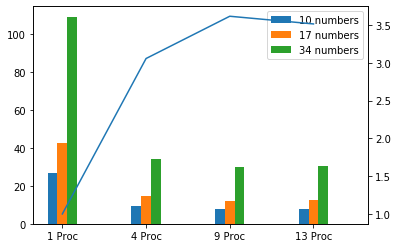

In [16]:

# set width of bar
width = .35 

# Read the data to plot bar and line graphs
m1_t = pd.DataFrame(numbers_dictionary)

# Make the plot for processors and speed up
m1_t[numbers_dictionary_to_plot].plot(kind='bar', width = width)
m1_t['speedup'].plot(secondary_y=True)

#Set label and x axes limit
ax = plt.gca()
plt.xlim([-width, len(m1_t['speedup'])-width])
ax.set_xticklabels((list_of_processors))

plt.show()

# Multiprocessing using Pools - PART 2


### The naive function for checking primes was edited so it divides the ranges of numbers to be checked between the number of processors. The function can be found in the python file functions_project_1. The Project Report, contains the explanaition.

## Dividing the ranges between the number of processors and calling the pool_process function

In [3]:
list_of_proc = [1,4,9,13]
prime_candidate_number = 7634568731
non_prime_candidate_number = 2803375971
candidate_number_to_run = non_prime_candidate_number

# Create empty an list to store the running times for each processor
list_processors_time = []
for proc in list_of_proc:
    
    # workers is the number of processors
    workers = proc
    
    # Create empty an list to store the lower ranges and upper ranges for each processor to run check_prime
    list_of_lower_ranges = []
    list_of_upper_ranges = []
    next_lower = 2
    
    # Create a range for each processor
    for i in range(1, workers+1):
        list_of_lower_ranges.append(next_lower)
        next_upper = round(candidate_number_to_run * (i/workers))
        list_of_upper_ranges.append(next_upper)
        next_lower = next_upper

    # Create dictionary with the number to be checked, lower ranges and upper ranges
    list_of_dicts = []

    for i in range(workers):
        thisdict = {}
        thisdict["number"] = candidate_number_to_run
        thisdict["lower"] = list_of_lower_ranges[i]
        thisdict["upper"] = list_of_upper_ranges[i]
        list_of_dicts.append(thisdict)
    
    # Each processor runs a range
    prime_candidate = list_of_dicts
    time_per_processor = pool_process(check_prime_multi, prime_candidate, proc)
    list_processors_time.append(time_per_processor)

2803375971 is not a prime number
3 times 934458657 is 2803375971
Time: 0
Task <ForkProcess(ForkPoolWorker-1, started daemon)> 2803375971 False
Results [False]
0.11644697189331055
2803375971 is not a prime number
3 times 934458657 is 2803375971
Time: 0
Task <ForkProcess(ForkPoolWorker-2, started daemon)> 2803375971 False
2803375971 is not a prime number
934458657 times 3 is 2803375971
Time: 22
Task <ForkProcess(ForkPoolWorker-3, started daemon)> 2803375971 False
2803375971 prime number not confirmed
Time: 84.53212809562683
Task <ForkProcess(ForkPoolWorker-5, started daemon)> 2803375971 True
2803375971 prime number not confirmed
Time: 84.78445100784302
Task <ForkProcess(ForkPoolWorker-4, started daemon)> 2803375971 True
Results [False, False, True, True]
84.8643057346344
2803375971 is not a prime number
2803375971 is not a prime number
2803375971 is not a prime number
3 times 934458657 is 2803375971
934458657 times 3 is 2803375971
311486219 times 9 is 2803375971
Time: 0
Time: 0
Time: 0
T

# Set data to plot in the graph

In [4]:
# Create list of processors' times that will be plotted
list_processors_time_to_plot = []
for i in range(len(list_processors_time)):
    if i != 0:
        list_processors_time_to_plot.append(list_processors_time[i])

In [5]:
# Create list of processors
list_of_processors = []
for processor in list_of_proc:
    processor_number = str(processor) + " Proc"
    list_of_processors.append(processor_number)

# Create list of processors to plot, excluding the list for 1 processor, which will not be plotted, it will only be
# used to calculate the speedup
list_of_processors_to_plot = []
for i in range(len(list_of_processors)):
    if i != 0:
        list_of_processors_to_plot.append(list_of_processors[i])

['1 Proc', '4 Proc', '9 Proc', '13 Proc']
['4 Proc', '9 Proc', '13 Proc']


# Calculate Speedup

In [6]:
#Use multidimensional array to split the running time of group numbers per processor
a = np.array(list_processors_time)

times_array_per_proc = np.column_stack([a])

# Create a dictionary with the run times for processors to be plotted and speedup
proc_dictionary = {}
proc_dictionary.update( {'Times' : list_processors_time_to_plot} )
proc_dictionary.update( {'speedup' : []} )

first_sum = -1
for i in range(len(list_of_processors)):
    current_sum = 0
    for item in times_array_per_proc[i]:
        current_sum += item
    if first_sum != -1:
        divison_calc = first_sum / current_sum
        proc_dictionary['speedup'].append(divison_calc)
    if first_sum == -1:
        first_sum = current_sum

# Plot the graph (prime number)

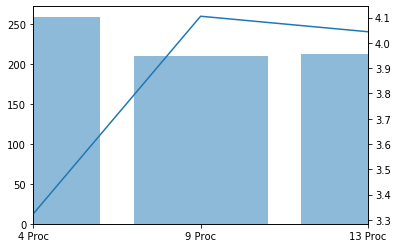

In [7]:
# Plotting results
objects = list_of_processors_to_plot
y_pos = np.arange(len(objects))
time_processors = list_processors_time_to_plot

plt.bar(y_pos, time_processors, alpha=0.5)
plt.xticks(y_pos, objects)

m1_t = pd.DataFrame(proc_dictionary)
m1_t['speedup'].plot(secondary_y=True)


plt.show()

# Plot the graph (non-prime number)

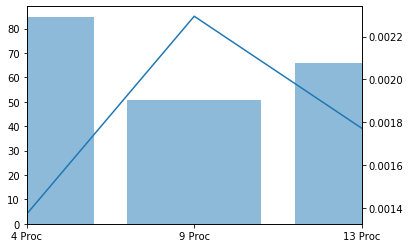

In [7]:
# Plotting results
objects = list_of_processors_to_plot
y_pos = np.arange(len(objects))
time_processors = list_processors_time_to_plot

plt.bar(y_pos, time_processors, alpha=0.5)
plt.xticks(y_pos, objects)

m1_t = pd.DataFrame(proc_dictionary)
m1_t['speedup'].plot(secondary_y=True)


plt.show()

# Run the check_prime function without the pool_process so as to compare results

In [8]:
# Run the check_prime function without the pool_process so as to compare results
tp1 = perf_counter() 
check_prime(candidate_number_to_run)
tp2 = perf_counter() 
overall_time_no_pool = tp2-tp1

2803375971 is not a prime number
3 times 934458657 is 2803375971
Time: 0


In [9]:
# Create list with non_prime run times - not using pool_process and using best case pool_process
non_prime_times = []
non_prime_times.append(list_processors_time[0])
non_prime_times.append(overall_time_no_pool)
non_prime_times.append(list_processors_time[len(list_processors_time)-2])

[0.11644697189331055, 0.0003762990000097943, 50.735795974731445]


In [10]:
# removing first item on the list to plot only run times for check_prime and pool_process
non_prime_times_to_plot = []
for i in range(len(non_prime_times)):
    if i != 0:
        non_prime_times_to_plot.append(non_prime_times[i])

[0.0003762990000097943, 50.735795974731445]


In [11]:
# Create a dictionary with the run times for processors to be plotted and speedup
non_prime_dictionary = {}
non_prime_dictionary.update( {'Times' : non_prime_times} )
non_prime_dictionary.update( {'speedup' : [1]} )

first_sum = -1
for i in range(len(non_prime_times)):
    current_sum = 0
    for item in times_array_per_proc[i]:
        current_sum += item
    if first_sum != -1:
        divison_calc = first_sum / current_sum
        non_prime_dictionary['speedup'].append(divison_calc)
    if first_sum == -1:
        first_sum = current_sum

Times [0.11644697189331055, 0.0003762990000097943, 50.735795974731445]
speedup [1, 0.0013721548875617183, 0.0022951639893716465]


In [12]:
# Before plotting the bar graph remove first item from all dictionary entries as we are not plotting it and only
# using it to calculate speedup
non_prime_dictionary_to_plot = {k: non_prime_dictionary[k][1:] for k in non_prime_dictionary}

{'Times': [0.0003762990000097943, 50.735795974731445], 'speedup': [0.0013721548875617183, 0.0022951639893716465]}


## Plot the graph (prime number)

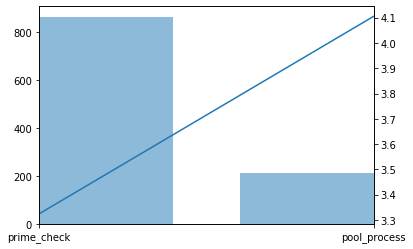

In [15]:
# Plotting results
objects = ['prime_check', 'pool_process']
y_pos = np.arange(len(objects))
time = non_prime_times_to_plot

plt.bar(y_pos, time, alpha=0.5)
plt.xticks(y_pos, objects)

m1_t = pd.DataFrame(non_prime_dictionary_to_plot)
m1_t['speedup'].plot(secondary_y=True)


plt.show()

## Plot the graph (non-prime number)

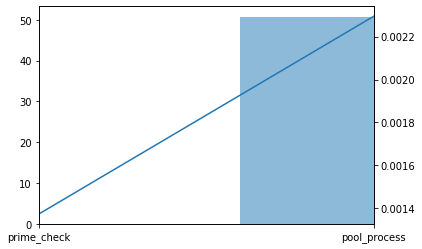

In [13]:
# Plotting results
objects = ['prime_check', 'pool_process']
y_pos = np.arange(len(objects))
time = non_prime_times_to_plot

plt.bar(y_pos, time, alpha=0.5)
plt.xticks(y_pos, objects)

m1_t = pd.DataFrame(non_prime_dictionary_to_plot)
m1_t['speedup'].plot(secondary_y=True)


plt.show()

Bar and line charts code taken from:
<br>
https://stackoverflow.com/questions/38810009/matplotlib-plot-bar-and-line-charts-together